### Задание

Самостоятельно напишите нейронную сеть, которая может стать составной частью системы бота для игры в "Крестики-нолики". Используя подготовленную базу изображений, создайте и обучите нейронную сеть, распознающую две категории изображений: крестики и нолики. Добейтесь точности распознавания более 95% (accuracy)


In [1]:
# Подключение класса для создания нейронной сети прямого распространения
from tensorflow.keras.models import Sequential
# Подключение класса для создания полносвязного слоя
from tensorflow.keras.layers import Dense
# Подключение оптимизатора
from tensorflow.keras.optimizers import Adam
# Подключение утилит для to_categorical
from tensorflow.keras import utils
# Подключение библиотеки для загрузки изображений
from tensorflow.keras.preprocessing import image
# Подключение библиотеки для работы с массивами
import numpy as np
# Подключение модуля для работы с файлами
import os
from sklearn.model_selection import train_test_split
# Подключение библиотек для отрисовки изображений
import matplotlib.pyplot as plt
from PIL import Image
# Вывод изображения в ноутбуке, а не в консоли или файле
%matplotlib inline

In [2]:
# Загрузка датасета из облака
import gdown
gdown.download('https://storage.yandexcloud.net/aiueducation/Content/base/l3/hw_pro.zip', None, quiet=True)

'hw_pro.zip'

In [3]:
# Распаковываем архив hw_light.zip в папку hw_light
!unzip -q hw_pro.zip

In [4]:
# Путь к директории с базой
base_dir = '/content/hw_pro'
# Создание пустого списка для загрузки изображений обучающей выборки
x_train = []
# Создание списка для меток классов
y_train = []
# Задание высоты и ширины загружаемых изображений
img_height = 20
img_width = 20
# Перебор папок в директории базы
for patch in os.listdir(base_dir):
    # Перебор файлов в папках
    for img in os.listdir(base_dir + '/' + patch):
        # Добавление в список изображений текущей картинки
        x_train.append(image.img_to_array(image.load_img(base_dir + '/' + patch + '/' + img,
                                                         target_size=(img_height, img_width),
                                                         color_mode='grayscale')))
        # Добавление в массив меток, соответствующих классам
        if patch == '0':
            y_train.append(0)
        else:
            y_train.append(1)
# Преобразование в numpy-массив загруженных изображений и меток классов
x_train_org = np.array(x_train)
y_train_org = np.array(y_train)
# Вывод размерностей
print('Размер массива x_train', x_train_org.shape)
print('Размер массива y_train', y_train_org.shape)

Размер массива x_train (102, 20, 20, 1)
Размер массива y_train (102,)


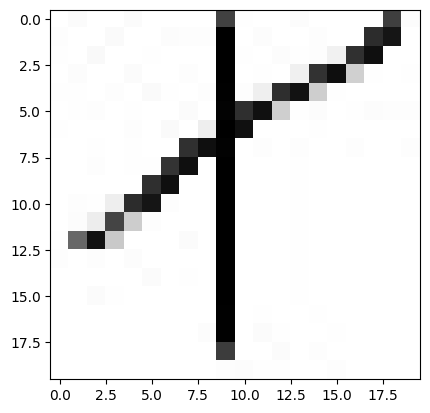

In [5]:
# Номер картинки
n = 56
# Отрисовка картинки
plt.imshow(x_train_org[n], cmap='gray')

# Вывод n-й картинки
plt.show()

In [6]:
# Разделение данных на обучающий и тестовый наборы
x_train_org, x_test_org, y_train_org, y_test_org = train_test_split(x_train_org, y_train_org, test_size=0.2, random_state=42)

In [7]:
x_train = x_train_org.reshape(x_train_org.shape[0], -1)
x_test = x_test_org.reshape(x_test_org.shape[0], -1)

# Проверка результата
print(f'Форма обучающих данных: {x_train.shape} -> {x_train_org.shape}')
print(f'Форма  тестовых данных: {x_test.shape} ')

Форма обучающих данных: (81, 400) -> (81, 20, 20, 1)
Форма  тестовых данных: (21, 400) 


In [8]:
x_train = x_train.astype('float32') / 255.

# Преобразование x_test в тип float32 (числа с плавающей точкой) и нормализация
x_test = x_test.astype('float32') / 255.

In [9]:
CLASS_COUNT = 2
# Преобразование ответов в формат one_hot_encoding
y_train = utils.to_categorical(y_train_org, CLASS_COUNT)
y_test = utils.to_categorical(y_test_org, CLASS_COUNT)

In [10]:
print(y_train.shape)
print(y_train[0])

(81, 2)
[0. 1.]


In [61]:
model = Sequential()

In [62]:
model.add(Dense(32, input_dim=400, activation='relu')) # Размер изображения 20 на 20
model.add(Dense(15, activation='linear'))
model.add(Dense(10, activation='linear'))
model.add(Dense(2, activation='softmax')) # последний слой

In [63]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

model.fit(x_train, y_train, batch_size=10, epochs=15, verbose=1)

Epoch 1/15
9/9 [==============================] - 1s 5ms/step - loss: 0.9649 - accuracy: 0.5185
Epoch 2/15
9/9 [==============================] - 0s 4ms/step - loss: 0.6292 - accuracy: 0.6049
Epoch 3/15
9/9 [==============================] - 0s 4ms/step - loss: 0.5353 - accuracy: 0.7407
Epoch 4/15
9/9 [==============================] - 0s 4ms/step - loss: 0.4653 - accuracy: 0.9136
Epoch 5/15
9/9 [==============================] - 0s 4ms/step - loss: 0.4448 - accuracy: 0.8519
Epoch 6/15
9/9 [==============================] - 0s 4ms/step - loss: 0.3604 - accuracy: 0.9383
Epoch 7/15
9/9 [==============================] - 0s 6ms/step - loss: 0.3178 - accuracy: 0.9630
Epoch 8/15
9/9 [==============================] - 0s 4ms/step - loss: 0.3571 - accuracy: 0.8519
Epoch 9/15
9/9 [==============================] - 0s 4ms/step - loss: 0.2678 - accuracy: 0.9383
Epoch 10/15
9/9 [==============================] - 0s 4ms/step - loss: 0.2258 - accuracy: 0.9136
Epoch 11/15
9/9 [======================

In [64]:
model.save_weights('model.h5')
model.load_weights('model.h5')

In [65]:
loss, accuracy = model.evaluate(x_test, y_test)
print("Model - Test Accuracy:", accuracy)

1/1 [==============================] - 0s 205ms/step - loss: 0.1782 - accuracy: 0.9524
Model - Test Accuracy: 0.9523809552192688
